In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
# Загрузка данных
df =pd.read_csv('AirQuality.csv', sep=';', decimal=',', na_values='-200')
df.head(5)



,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [ ]:

#  Выбор подмножества признаков
selected_features = ["CO(GT)", "NMHC(GT)", "NOx(GT)", "NO2(GT)", "T"]
df_selected = df[selected_features]

# Обработка данных
df_selected = df_selected.dropna()  # Удаление строк с отсутствующими значениями
df_selected = df_selected.astype(float)  # Преобразование типов данных во float

# Стандартизация данных
scaler = StandardScaler()
df_selected_scaled = scaler.fit_transform(df_selected)


In [ ]:
# Получение датасета D1
D1 = df_selected


In [ ]:

# Снижение размерности с помощью PCA (до 2 компонентов)
pca = PCA(n_components=2)
D2 = pca.fit_transform(D1)


In [ ]:
# Снижение размерности с помощью t-SNE (до 2 компонентов)
tsne = TSNE(n_components=2)
D3 = tsne.fit_transform(D1)


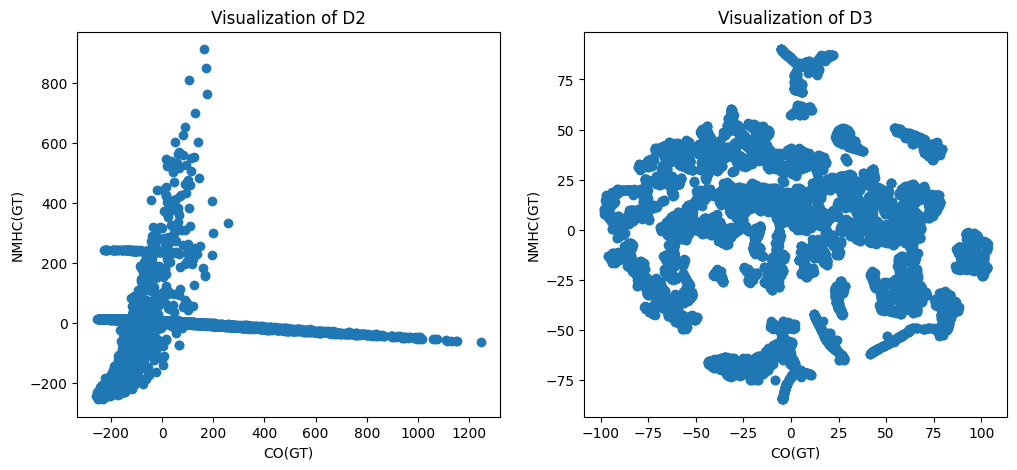

In [ ]:

# Визуализация точек в D2 и D3
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(D2[:, 0], D2[:, 1])
plt.title("Visualization of D2")
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])

plt.subplot(1, 2, 2)
plt.scatter(D3[:, 0], D3[:, 1])
plt.title("Visualization of D3")
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])

plt.show()


In [ ]:

# Кластеризация и оценка качества
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.5, min_samples=5)
agglo = AgglomerativeClustering(n_clusters=2)

clustering_algorithms = [kmeans, dbscan, agglo]

for algorithm in clustering_algorithms:
    algorithm.fit(D1)
    labels = algorithm.labels_
    
    silhouette = silhouette_score(D1, labels)
    db_score = davies_bouldin_score(D1, labels)
    print("D1:")
    print("Clustering Algorithm:", type(algorithm).__name__)
    print("Silhouette Score:", silhouette)
    print("Davies-Bouldin Score:", db_score)
    print("")

for algorithm in clustering_algorithms:
    algorithm.fit(D2)
    labels = algorithm.labels_
    
    silhouette = silhouette_score(D2, labels)
    db_score = davies_bouldin_score(D2, labels)
    print("D2:")
    print("Clustering Algorithm:", type(algorithm).__name__)
    print("Silhouette Score:", silhouette)
    print("Davies-Bouldin Score:", db_score)
    print("")

for algorithm in clustering_algorithms:
    algorithm.fit(D3)
    labels = algorithm.labels_
    
    silhouette = silhouette_score(D3, labels)
    db_score = davies_bouldin_score(D3, labels)
    print("D3:")
    print("Clustering Algorithm:", type(algorithm).__name__)
    print("Silhouette Score:", silhouette)
    print("Davies-Bouldin Score:", db_score)
    print("")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


D1:
Clustering Algorithm: KMeans
Silhouette Score: 0.602678121511925
Davies-Bouldin Score: 0.6116710488804521

D1:
Clustering Algorithm: DBSCAN
Silhouette Score: -0.6383772227113248
Davies-Bouldin Score: 1.5770016585228301

D1:
Clustering Algorithm: AgglomerativeClustering
Silhouette Score: 0.43823190151975977
Davies-Bouldin Score: 0.8208440649678312



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


D2:
Clustering Algorithm: KMeans
Silhouette Score: 0.6208813452149773
Davies-Bouldin Score: 0.5800616855854845

D2:
Clustering Algorithm: DBSCAN
Silhouette Score: -0.3188196668795777
Davies-Bouldin Score: 2.162299964833649

D2:
Clustering Algorithm: AgglomerativeClustering
Silhouette Score: 0.6366457354824067
Davies-Bouldin Score: 0.516975516286243



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


D3:
Clustering Algorithm: KMeans
Silhouette Score: 0.40144396
Davies-Bouldin Score: 0.9757465731280118

D3:
Clustering Algorithm: DBSCAN
Silhouette Score: -0.3468473
Davies-Bouldin Score: 1.495401558917545

D3:
Clustering Algorithm: AgglomerativeClustering
Silhouette Score: 0.37909976
Davies-Bouldin Score: 1.0648059644313297



Метод AgglomerativeClustering оказался лучшим для датасета D2 
Метод KMeans - лучший для D3 